In [1]:
import mne
import matplotlib.pyplot as plt
#scripts from https://mne.tools/0.11/auto_tutorials/plot_introduction.html

## Lecture des données EEG

In [2]:
vhdr_file= '../EEG_Data/raw/S10_NF1.vhdr'
raw = mne.io.read_raw_brainvision(vhdr_file)

Extracting parameters from ../EEG_Data/raw/S10_NF1.vhdr...
Setting channel info structure...


In [3]:
print(raw.info)

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, ...
    chs : list | 64 items (EEG: 64)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.015915494309189534 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : tuple | 2016-08-03 09:54:04 GMT
    nchan : int | 64
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 5000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj

(64, 75000)
(75000,)


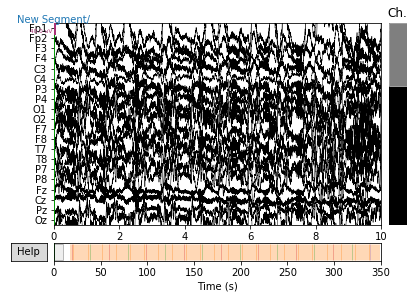

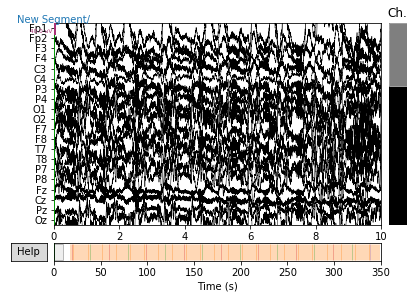

In [4]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:, start:stop]
print(data.shape)
print(times.shape)
data, times = raw[2:20:3, start:stop]  # access underlying data

raw.plot()

[-1.350e-05 -1.400e-05 -1.450e-05 ... -2.535e-04 -2.550e-04 -2.545e-04]
[0.000000e+00 2.000000e-04 4.000000e-04 ... 3.508994e+02 3.508996e+02
 3.508998e+02]


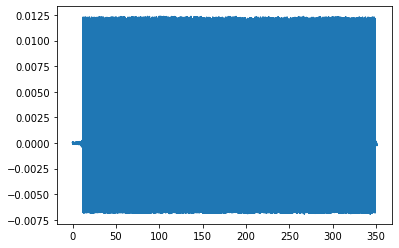

In [5]:
data,time = raw [:]
data_firstEEG = data[0,:]
print(data_firstEEG)
print(time)

plt.plot(time, data_firstEEG)

## Lecture des annotations

In [6]:
annotations = mne.read_annotations('../EEG_Data/raw/S10_NF1.vmrk')

print(annotations)
print(annotations[1])
print(annotations[1]['onset'], annotations[1]['duration'], annotations[1]['description'], annotations[1]['orig_time'])

Finding 'sfreq' from header file: ../EEG_Data/raw/S10_NF1.vhdr
<Annotations  |  350 segments : New Segment/ (1), Response/R128 (332), Stimulus/S 99 (8)..., orig_time : None>
OrderedDict([('onset', 16.9916), ('duration', 0.0002), ('description', 'Response/R128'), ('orig_time', None)])
16.9916 0.0002 Response/R128 None


In [7]:
for annotation in annotations:
    print(annotation)

OrderedDict([('onset', 0.0), ('duration', 0.0002), ('description', 'New Segment/'), ('orig_time', None)])
OrderedDict([('onset', 16.9916), ('duration', 0.0002), ('description', 'Response/R128'), ('orig_time', None)])
OrderedDict([('onset', 17.9916), ('duration', 0.0002), ('description', 'Response/R128'), ('orig_time', None)])
OrderedDict([('onset', 18.9916), ('duration', 0.0002), ('description', 'Response/R128'), ('orig_time', None)])
OrderedDict([('onset', 19.0268), ('duration', 0.0002), ('description', 'Stimulus/S 99'), ('orig_time', None)])
OrderedDict([('onset', 19.9916), ('duration', 0.0002), ('description', 'Response/R128'), ('orig_time', None)])
OrderedDict([('onset', 20.9916), ('duration', 0.0002), ('description', 'Response/R128'), ('orig_time', None)])
OrderedDict([('onset', 21.9916), ('duration', 0.0002), ('description', 'Response/R128'), ('orig_time', None)])
OrderedDict([('onset', 22.9916), ('duration', 0.0002), ('description', 'Response/R128'), ('orig_time', None)])
Ordere

In [8]:
pp_annotations = mne.read_annotations('../EEG_Data/pp1/S10_NF1_$pp1_new.vmrk')
for annotation in pp_annotations:
    print(annotation)

Finding 'sfreq' from header file: ../EEG_Data/pp1/S10_NF1_$pp1_new.vhdr
OrderedDict([('onset', 0.0), ('duration', 0.005), ('description', 'Time 0/'), ('orig_time', None)])
OrderedDict([('onset', 0.0), ('duration', 0.005), ('description', 'New Segment/'), ('orig_time', None)])
OrderedDict([('onset', 0.0), ('duration', 0.005), ('description', 'Stimulus/S 99'), ('orig_time', None)])
OrderedDict([('onset', 0.175), ('duration', 0.005), ('description', 'Pulse Artifact/R'), ('orig_time', None)])
OrderedDict([('onset', 0.965), ('duration', 0.005), ('description', 'Response/R128'), ('orig_time', None)])
OrderedDict([('onset', 1.065), ('duration', 0.005), ('description', 'Pulse Artifact/R'), ('orig_time', None)])
OrderedDict([('onset', 1.845), ('duration', 0.005), ('description', 'Pulse Artifact/R'), ('orig_time', None)])
OrderedDict([('onset', 1.965), ('duration', 0.005), ('description', 'Response/R128'), ('orig_time', None)])
OrderedDict([('onset', 2.63), ('duration', 0.005), ('description', '

<KeysViewHDF5 ['ecg', 'eeg_c', 'eeg_fp', 'eeg_o', 'eeg_p']>
<HDF5 dataset "ecg": shape (66824, 1), type "<f4">
[-2023.9822]
(66824, 1)
[-2023.9822  -2602.4807  -2627.5376  ...   499.26627   393.83752
   273.47958]
[-2023.9822  -2602.4807  -2627.5376  ...   499.26627   393.83752
   273.47958]


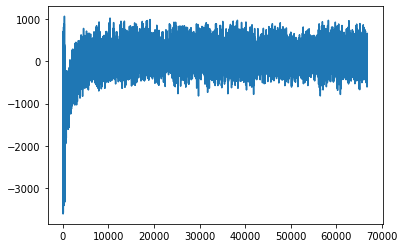

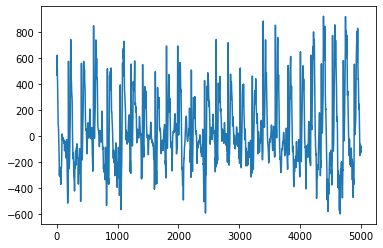

In [29]:
mat_file= '../EEG_Data/example_BCG_artifact.mat'
from scipy.io import loadmat
#annots = loadmat(mat_file)
import h5py
import numpy as np
with h5py.File(mat_file, 'r') as f:
    print(f.keys())
    print(f['ecg'])
    print(f['ecg'][0])
    print(f['ecg'].shape)
    s = np.array([f['ecg'][i][0] for i in range(f['ecg'].shape[0])] )
    s2 = np.array([v[0] for v in f['ecg']] )
    print(s)
    print(s2)
    plt.plot(range(f['ecg'].shape[0]), s)
    plt.show()
    start = 20000
    size = 5000
    plt.plot(range(size), s[start:start+size])